In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Hangfeldolgozás 2

A mérés célja, hogy több csatornán egyidőben, pontosan szinkronizált mintavételezéssel rögzítsünk jelet mikrofonok segítségével. A hangsebesség meghatározásán túl, megismerkedhetünk a mikrofon karakterisztikájával, és a pozíciómeghatározás inverz problémáját célozzuk megoldani.

A hangminták rögzítésére az `audacity` programot használhatjuk. A felvett hangminta fájlokat ne felejtse a jegyzőkönyvhöz csatolni.

<img src="supplementary/hangkártya.png" alt="hangkártya">
Győződjön meg arról, hogy a külső hangkártya, fenti kép, be van kapcsolva és a mikrofonokra fel van kapcsolva az úgy nevezett 48 V-os fantom táp. 

Az `audacity`-ben válassza ki a megfelelő bemeneti eszközt `AudioBox 1818 VSL: USB Audio (hw 1,0): Line: 0`. A hangkártya 96 kHz mintavételi rátát és 24 bit felbontást támogat, igyekezzen ezt kihasználni.

## 1. feladat: A jel-zaj arány vizsgálata

A mérésben *etalon* hangforrást használunk. Ennek közelébe helyezze el a mikrofonokat, és állítsa be a hangszóró hangerejét, valamint a mikrofonok előerősítésének mértékét úgy, hogy a jelek ne legyenek túlvezérelve. Ebben segít az `audacity` felvételi monitora, ami az első két mikrofon jelét mutatja.

### 1. 1. Háttér felvétele - 5 pont

Vizsgáljuk meg, hogy a teremben milyen teljesítménye van az alapzajnak.

Rögzítsen alkalmasan hosszú jelalakot az összes mikrofont egyszerre felhasználva!

Az idősorok alapján határozza meg, az egyes csatornákat jellemző:
* amplitudóeloszlást, 
* az átlagos jelteljesítményt, és
* a teljesítményspektrumot!

Van-e eltérés az egyes csatornák között?

Az adatsort rövidebb szakaszokra bontva is határozza meg a várható jelteljesítményt, készítsen erről is ábrákat és elemezze!

Mit vár és mit tapasztal?

In [2]:
import scipy.io.wavfile
import seaborn as sns  

[sps1, data1] = scipy.io.wavfile.read('hatter/hatter1.wav')
[sps2, data2] = scipy.io.wavfile.read('hatter/hatter2.wav')
[sps3, data3] = scipy.io.wavfile.read('hatter/hatter3.wav')
[sps4, data4] = scipy.io.wavfile.read('hatter/hatter4.wav')
[sps5, data5] = scipy.io.wavfile.read('hatter/hatter5.wav')
[sps6, data6] = scipy.io.wavfile.read('hatter/hatter6.wav')
[sps7, data7] = scipy.io.wavfile.read('hatter/hatter7.wav')

In [3]:
data = [data1,data2,data3,data4,data5,data6,data7]
sps = [sps1,sps2,sps3,sps4,sps5,sps6,sps7]

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

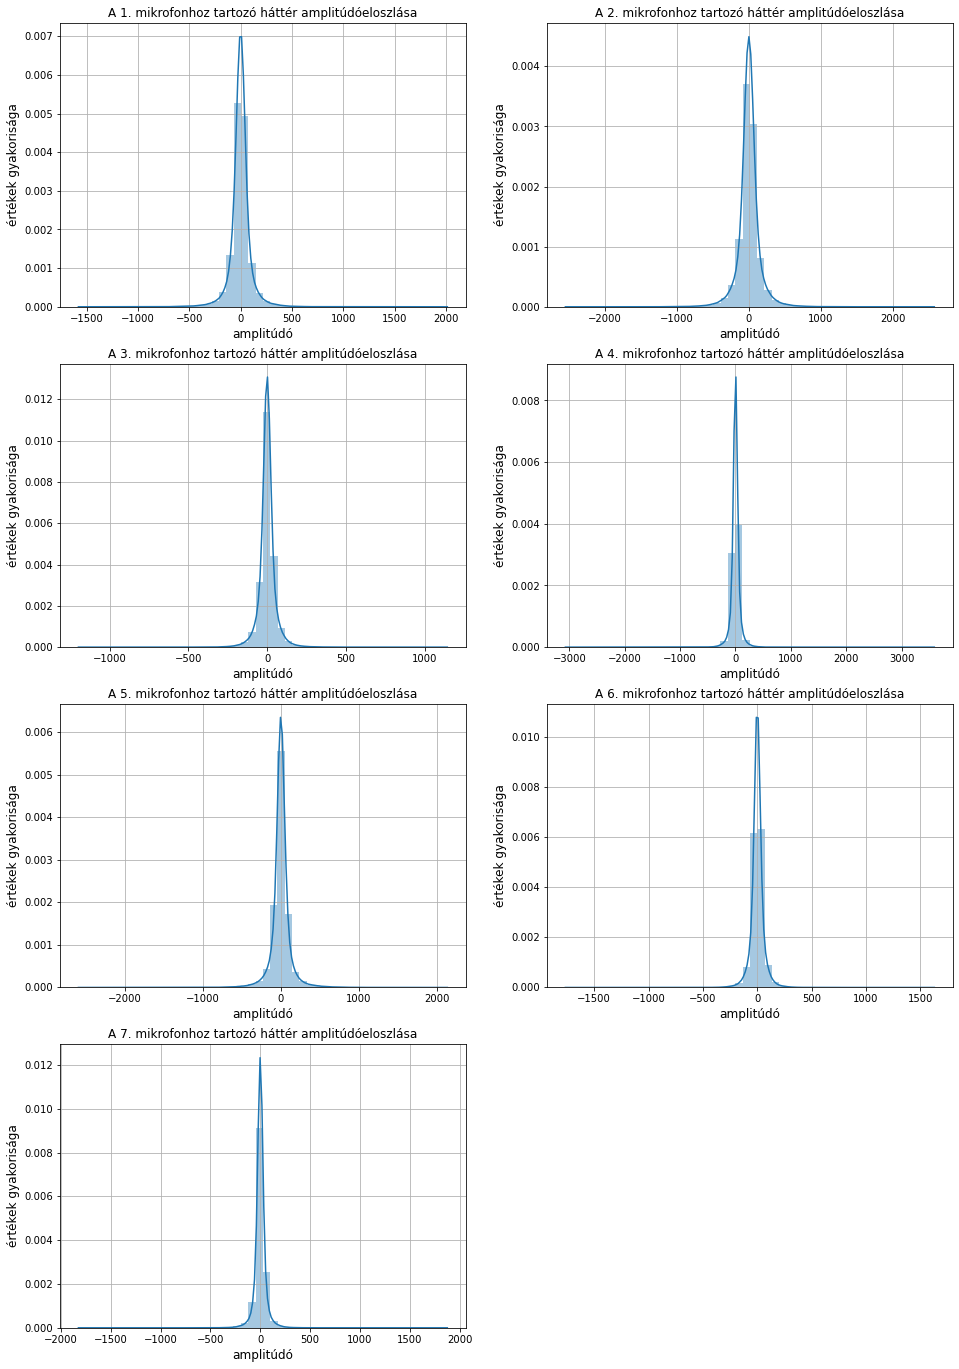

In [4]:
figsize(16,24)
for i in range(7):
    subplot(4,2,i+1)
    ax=sns.distplot(data[i])
    xlabel("amplitúdó",fontsize=12)
    ylabel("értékek gyakorisága",fontsize=12)
    title("A " + str(i+1) + ". mikrofonhoz tartozó háttér amplitúdóeloszlása")
    grid()

In [5]:
atlagteljesítmények = []
for i in range(7):
    atlagteljesítmények.append(sum(data[i]**2)/len(data[i]))


In [6]:
for item in atlagteljesítmények:
    print(item)

2999.4754658230977
3955.05249096033
1755.5244303027669
2454.3218689576925
3164.8356871458996
2067.4072168173766
1737.3446448259738


In [7]:
#teljesítmény spektrumok

def power_spectrum(signal, sampling_rate):

    fft_result = np.fft.fft(signal)
    
    #eredményt négyzetre emeljük
    power_spectrum = np.abs(fft_result)**2
    
    #frekvenciák 
    frequencies = np.fft.fftfreq(len(signal), 1/sampling_rate)
    
    #pozitív frekvenciák
    positive_frequencies = frequencies[:len(frequencies)//2]
    positive_power_spectrum = power_spectrum[:len(power_spectrum)//2]
    
    return positive_frequencies, positive_power_spectrum

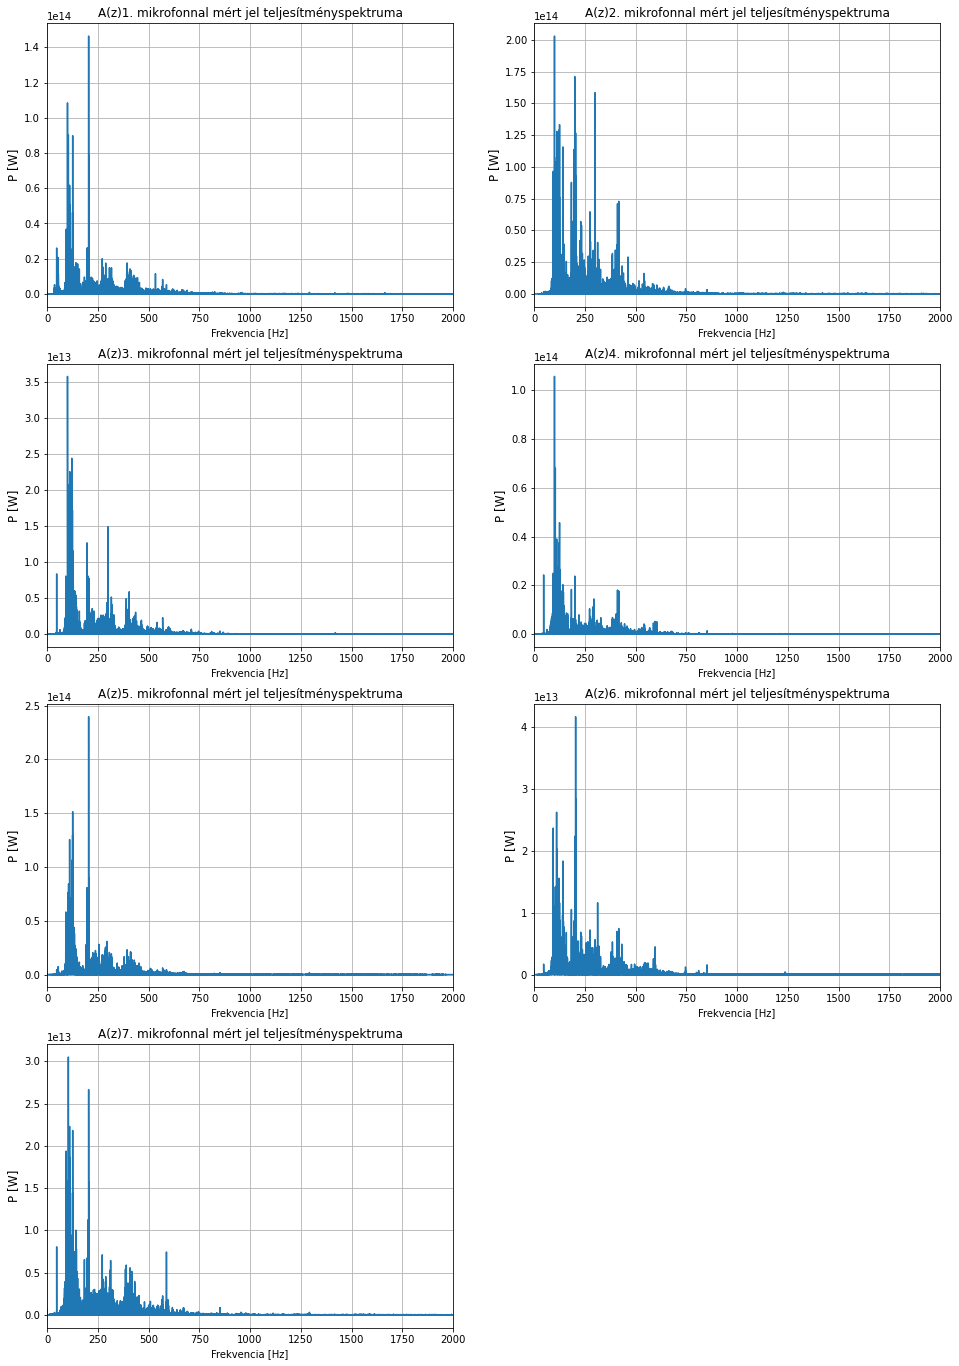

In [8]:
for i in range(7):
    subplot(4,2,i+1)
    positive_frequencies, positive_power_spectrum = power_spectrum(data[i],sps[i])
    plot(positive_frequencies,positive_power_spectrum)
    xlabel("Frekvencia [Hz]")
    ylabel("P [W]",fontsize=12)
    xlim(0,2000)
    title("A(z)" + str(i+1) + ". mikrofonnal mért jel teljesítményspektruma")
    grid()

In [9]:
atlagteljesítmények = []
for i in range(7):
    parts = np.split(data[i],7)
    for y in parts:
        atlagteljesítmények.append(sum(array(y)**2)/len(y))


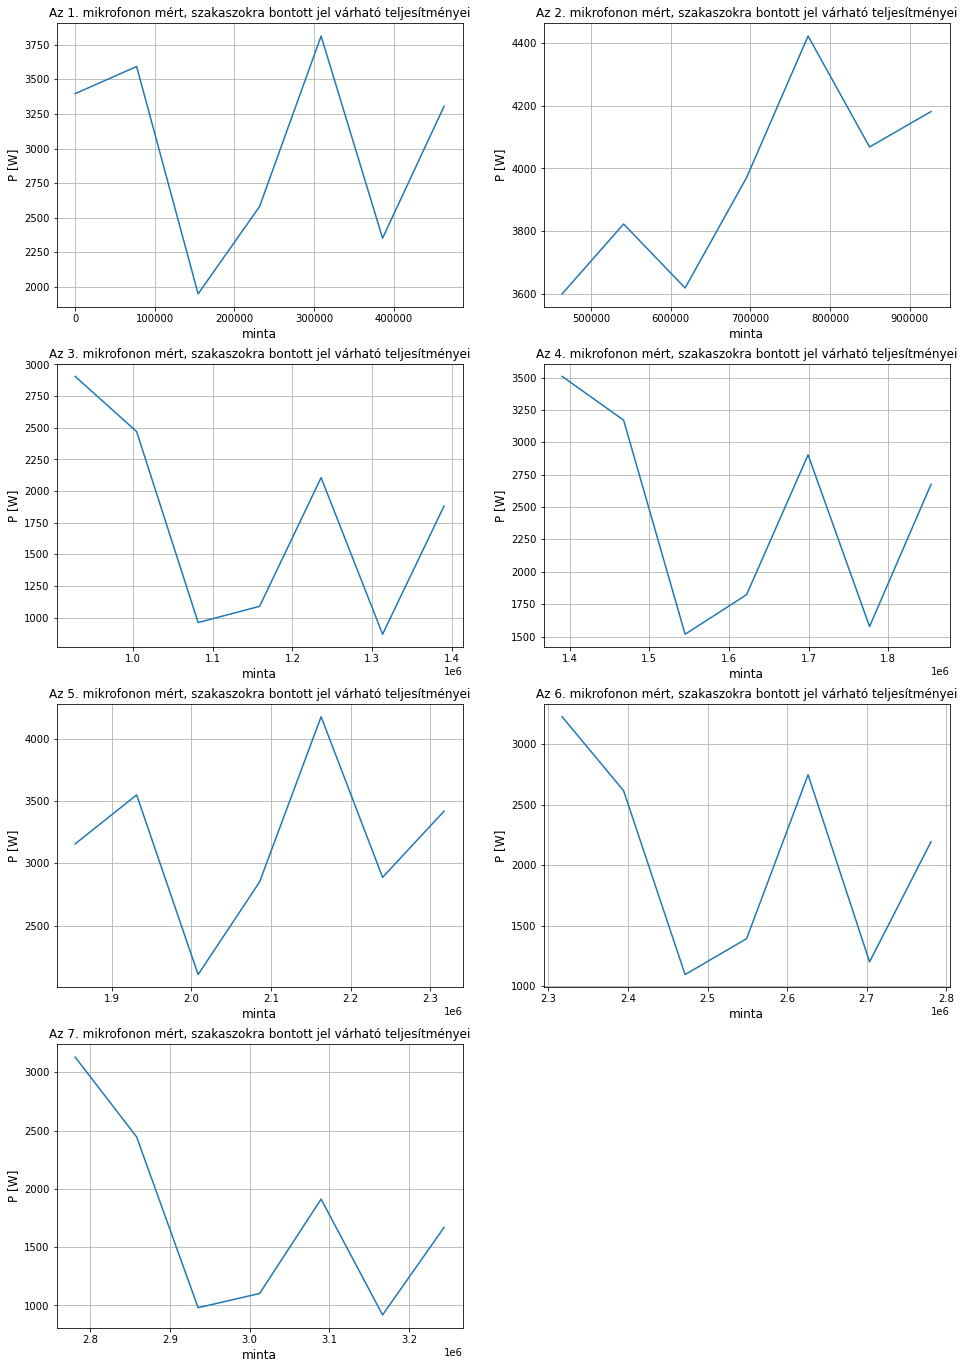

In [10]:
for i in range(7):
    mintavetel = np.linspace(0+(i*len(data[0])/7),len(data[0])/7+(i*len(data[0])/7),7)
    subplot(4,2,i+1)
    plot( mintavetel,atlagteljesítmények[0+i*7:7+i*7])
    xlabel("minta",fontsize=12)
    ylabel("P [W]",fontsize=12)
    title("Az " + str(i+1) + ". mikrofonon mért, szakaszokra bontott jel várható teljesítményei")
    grid()

### 1. 2. Kopogtató jele - 5 pont

Rögzítse a korábban beállított etalon hangforrás jelét.

A rögzített mintákban keresse meg a kopogtató jelét és számolja ki a koppanásokhoz tartozó jel teljesítményét!

Készítse el a teljesítményspektrumot és vesse egybe a háttérrel.

Térjen ki a következő kérdések megválaszolására:
* Mennyire ingadozik egy-egy csatornán belül a koppanáshoz tartozó jelteljesítmény érték?
* Milyen jel-zaj viszonyt tud becsülni az egyes csatornákra?
* Vizsgálja meg a jel/zaj viszony távolság függését!

In [11]:
[sps1, data1] = scipy.io.wavfile.read('kopogas/kopogás-01-2.wav')
[sps2, data2] = scipy.io.wavfile.read('kopogas/kopogás-02-2.wav')
[sps3, data3] = scipy.io.wavfile.read('kopogas/kopogás-03-2.wav')
[sps4, data4] = scipy.io.wavfile.read('kopogas/kopogás-04-2.wav')
[sps5, data5] = scipy.io.wavfile.read('kopogas/kopogás-05-2.wav')
[sps6, data6] = scipy.io.wavfile.read('kopogas/kopogás-06-2.wav')
[sps7, data7] = scipy.io.wavfile.read('kopogas/kopogás-07-2.wav')

t = linspace(0,len(data1)/sps1, len(data1))

In [12]:
data2 = [data1,data2,data3,data4,data5,data6,data7]
sps2 = [sps1,sps2,sps3,sps4,sps5,sps6,sps7]

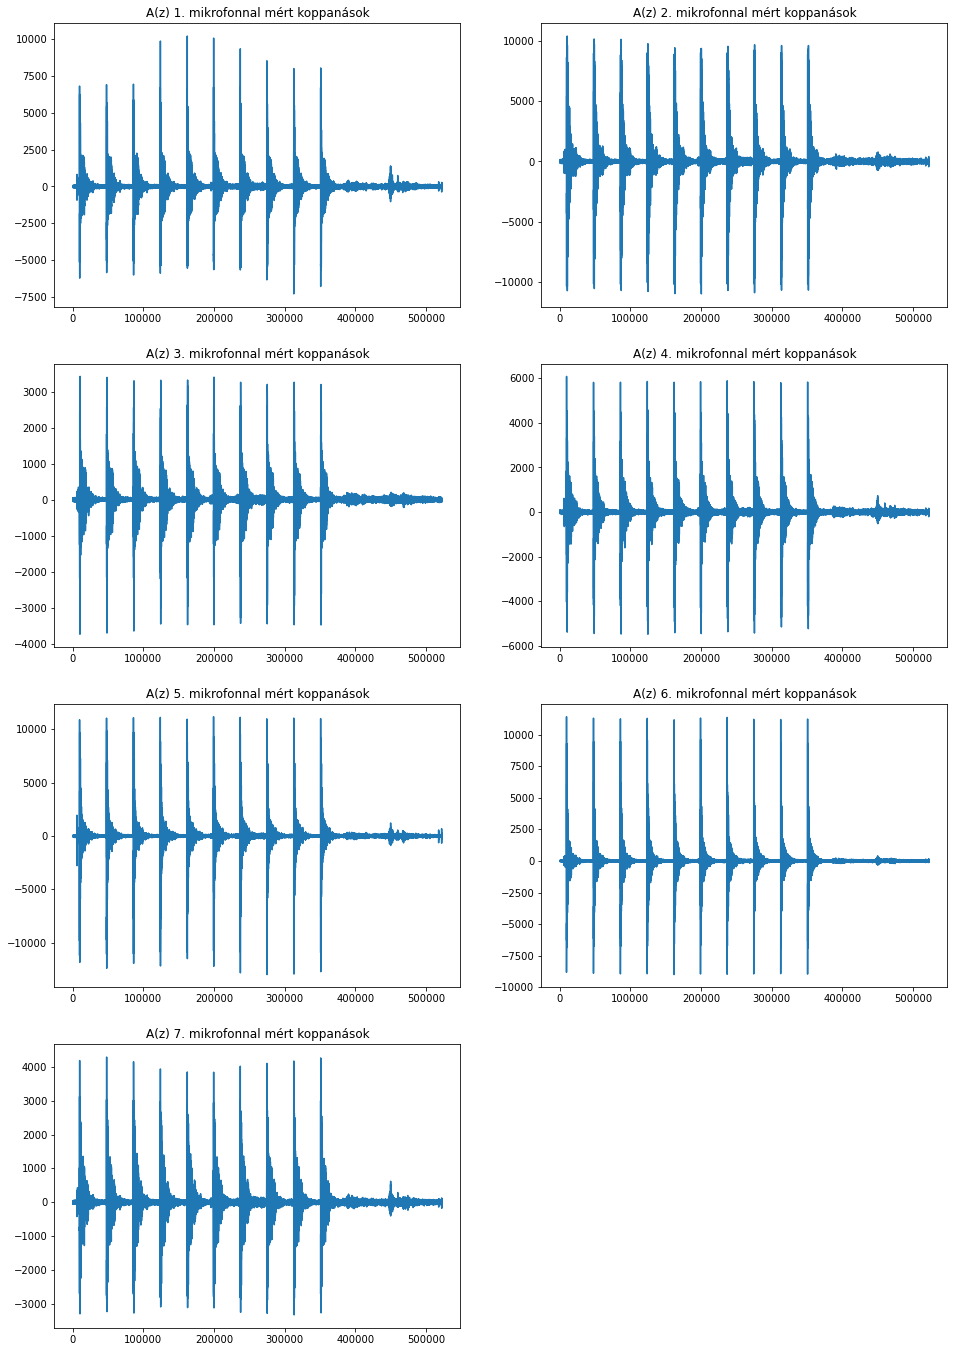

In [13]:
for i in range(7):
    subplot(4,2,i+1)
    plot(data2[i])
    title("A(z) " + str(i+1) +". mikrofonnal mért koppanások" )

In [16]:
def koppteljesítmény(data):
    split = np.where(data > 2500)[0]
    indices = np.where(np.abs(np.diff(split)) > 1000)[0] + 1
    indices = np.concatenate((array([0]),indices))
    teljesítmények = []
    data = data[split]
    for i in range(len(indices)-1):
        teljesítmények.append(sum(data[indices[i]:indices[i]+100])**2/100)
    return teljesítmények
    

In [17]:
data2

[array([  0,  -4, -15, ...,  43,   9, -20], dtype=int16),
 array([-84, -85, -84, ..., -41, -63,  92], dtype=int16),
 array([ -7,  -9, -15, ...,   6,   9,   8], dtype=int16),
 array([-36, -33, -33, ..., -48,  29, 113], dtype=int16),
 array([ -3, -18, -29, ...,  68,  88,  26], dtype=int16),
 array([-12, -10, -16, ..., -41,  47,  28], dtype=int16),
 array([-19, -16, -18, ...,   8, -37, -95], dtype=int16)]

In [18]:
pow1 = koppteljesítmény(data2[0])
pow2 = koppteljesítmény(data2[1])
pow3 = koppteljesítmény(data2[2])
pow4 = koppteljesítmény(data2[3])
pow5 = koppteljesítmény(data2[4])
pow6 = koppteljesítmény(data2[5])
pow7 = koppteljesítmény(data2[6])
power = [pow1,pow2,pow3,pow4,pow4,pow5,pow6,pow7]

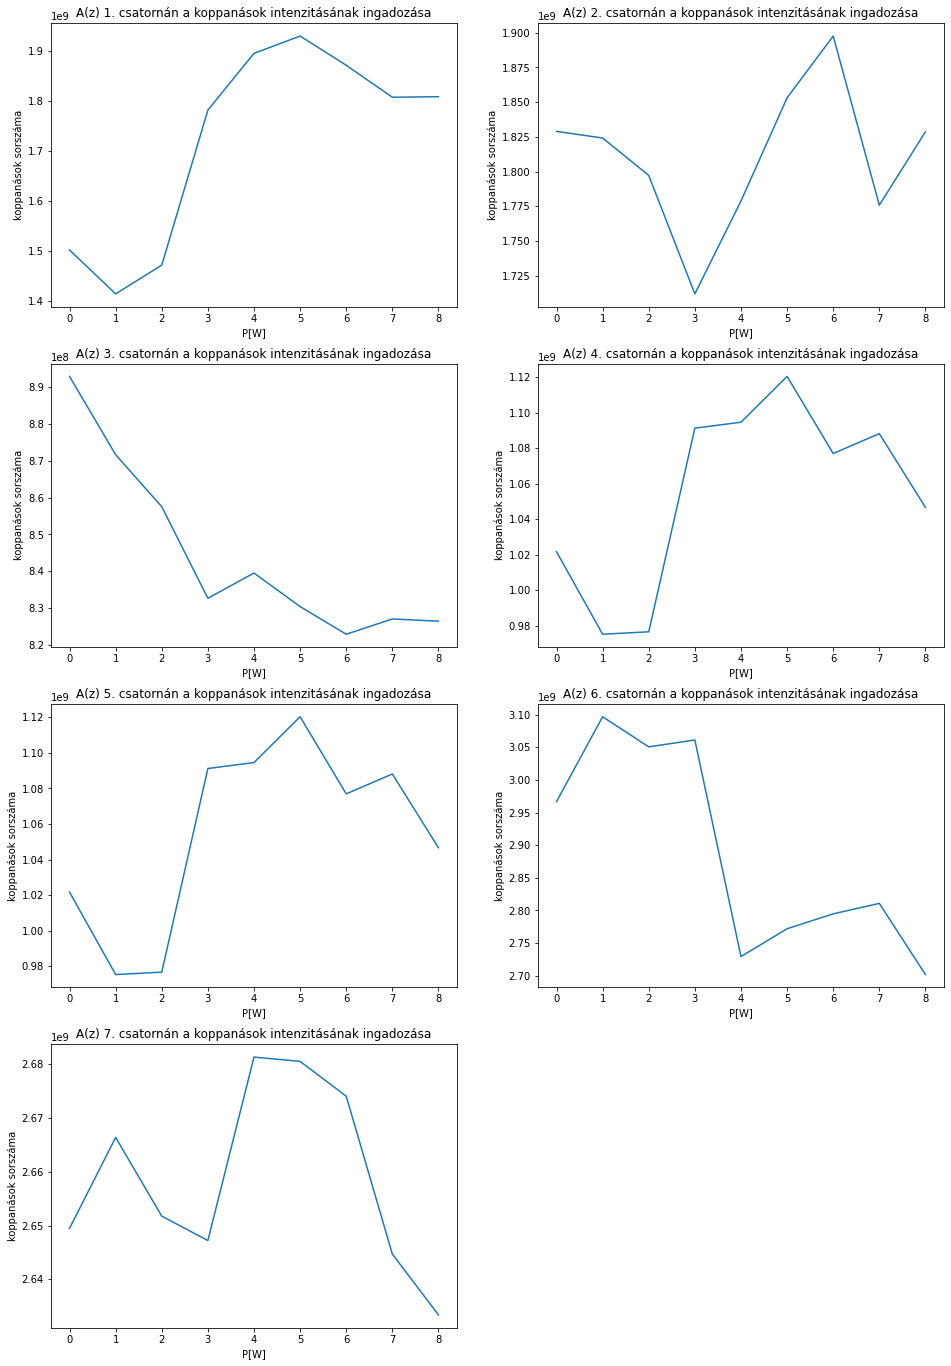

In [19]:
for i in range(7):
    subplot(4,2,i+1)
    plot(power[i])
    xlabel("P[W]")
    ylabel("koppanások sorszáma")
    title("A(z) " + str(i+1) +". csatornán a koppanások intenzitásának ingadozása" )

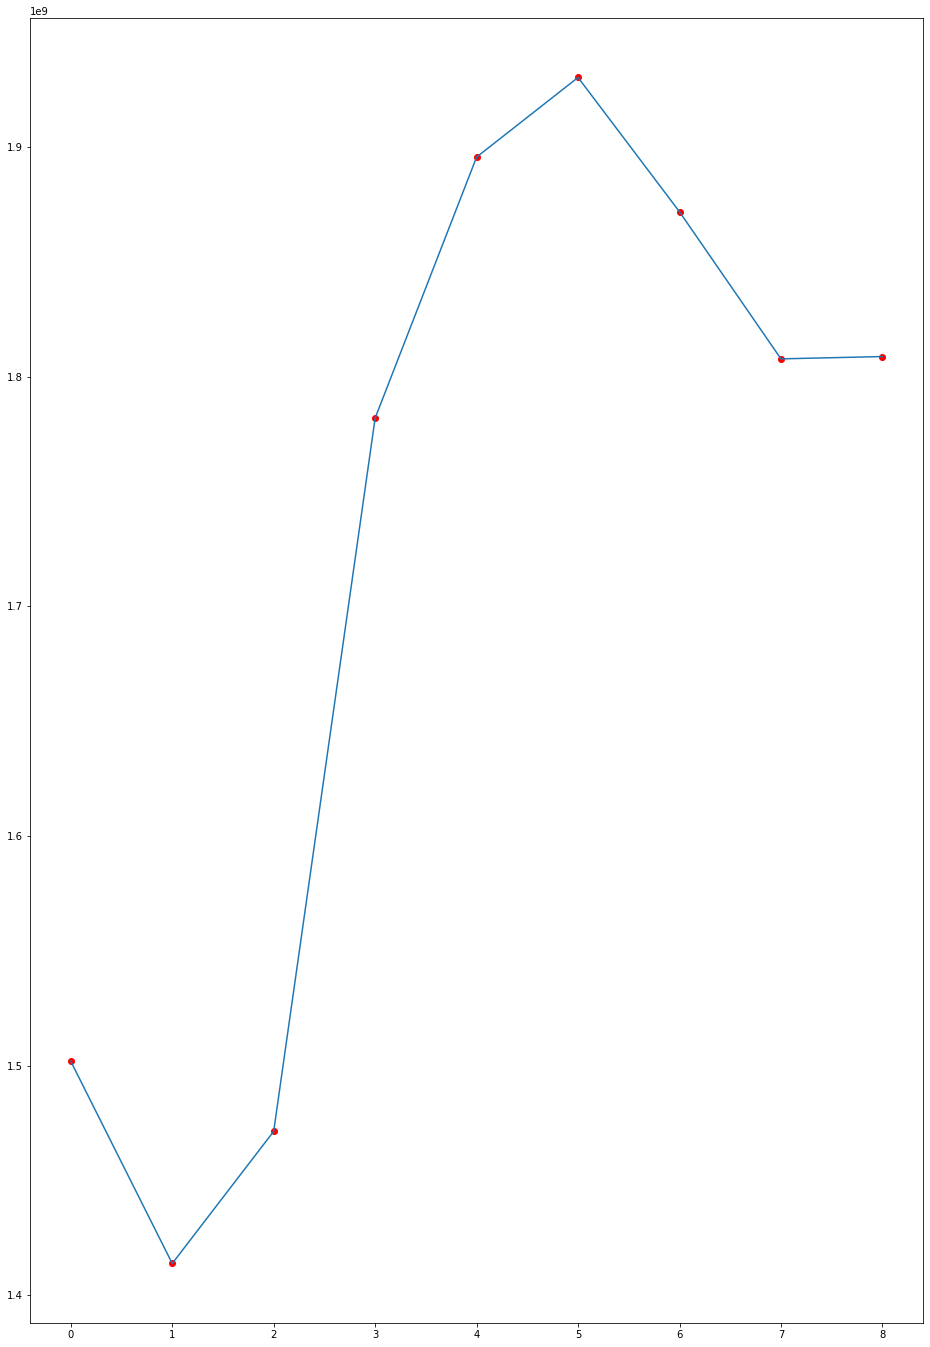

In [20]:
plot(pow1, "ro")
plot(pow1)

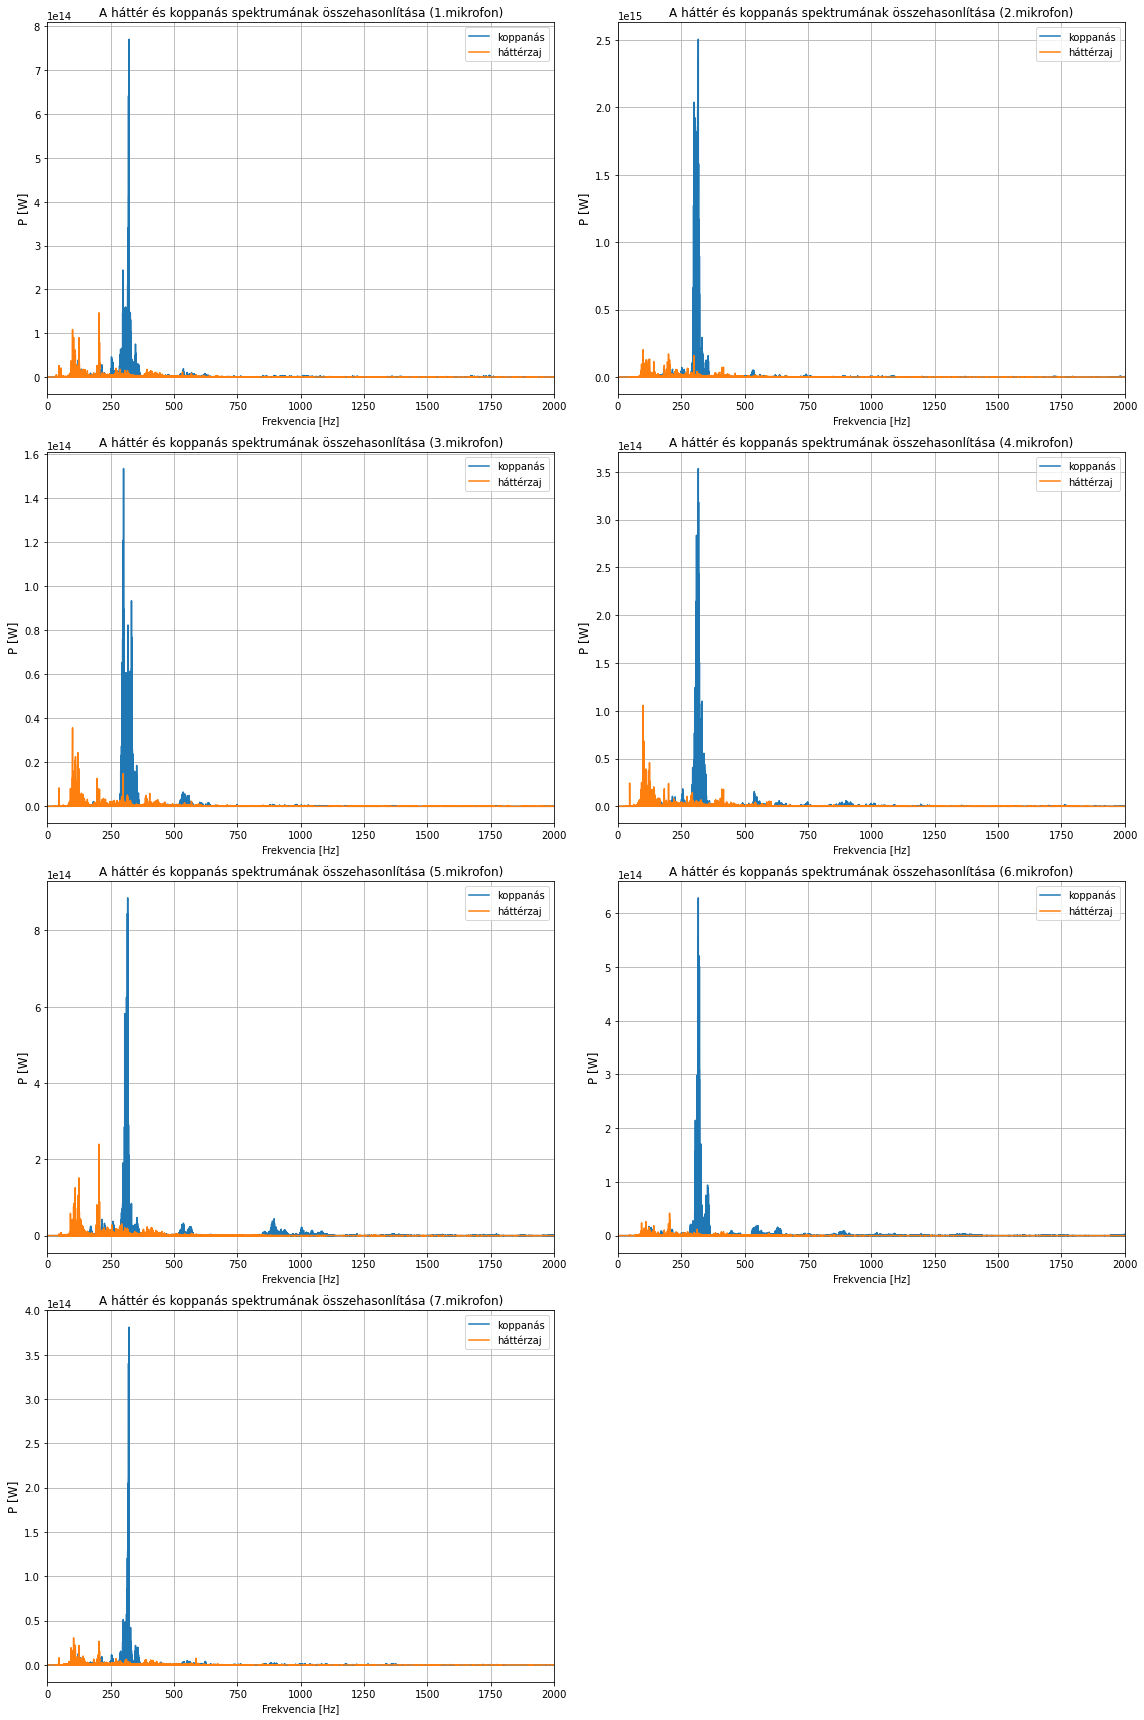

In [21]:
figsize(16,24)
for i in range(7):
    subplot(4,2,i+1)
    positive_frequencies, positive_power_spectrum = power_spectrum(data[i],sps[i])
    positive_frequencies1, positive_power_spectrum1 = power_spectrum(data2[i],sps2[i])
    plot(positive_frequencies1,positive_power_spectrum1, label = "koppanás")
    plot(positive_frequencies,positive_power_spectrum, label = "háttérzaj")
    xlabel("Frekvencia [Hz]")
    ylabel("P [W]",fontsize=12)
    xlim(0,2000)
    title("A háttér és koppanás spektrumának összehasonlítása (" + str(i+1) + ".mikrofon)")
    grid()
    legend()
tight_layout()

## 2. feladat: A terem hőmérsékletének becslése - 5 pont

A méréshez két mikrofonra lesz szükség. Igyekezzen a mikrofonokat és a *kopogtatót* egy vonalban elhelyezni. A mikrofonok távolságát változtatva rögzítse a kopogtató hangját. Keresse meg a jel felfutását minden csatornán például minta indexben mérve. Ábrázolja ezek különbségét a távolságkülönbség függvényében és illesszen modellt! 

A hibák becsléséről se feledkezzen meg!

In [22]:
sps,data =  scipy.io.wavfile.read("homerseklet/10meres43c.wav")

(65000.0, 66000.0)

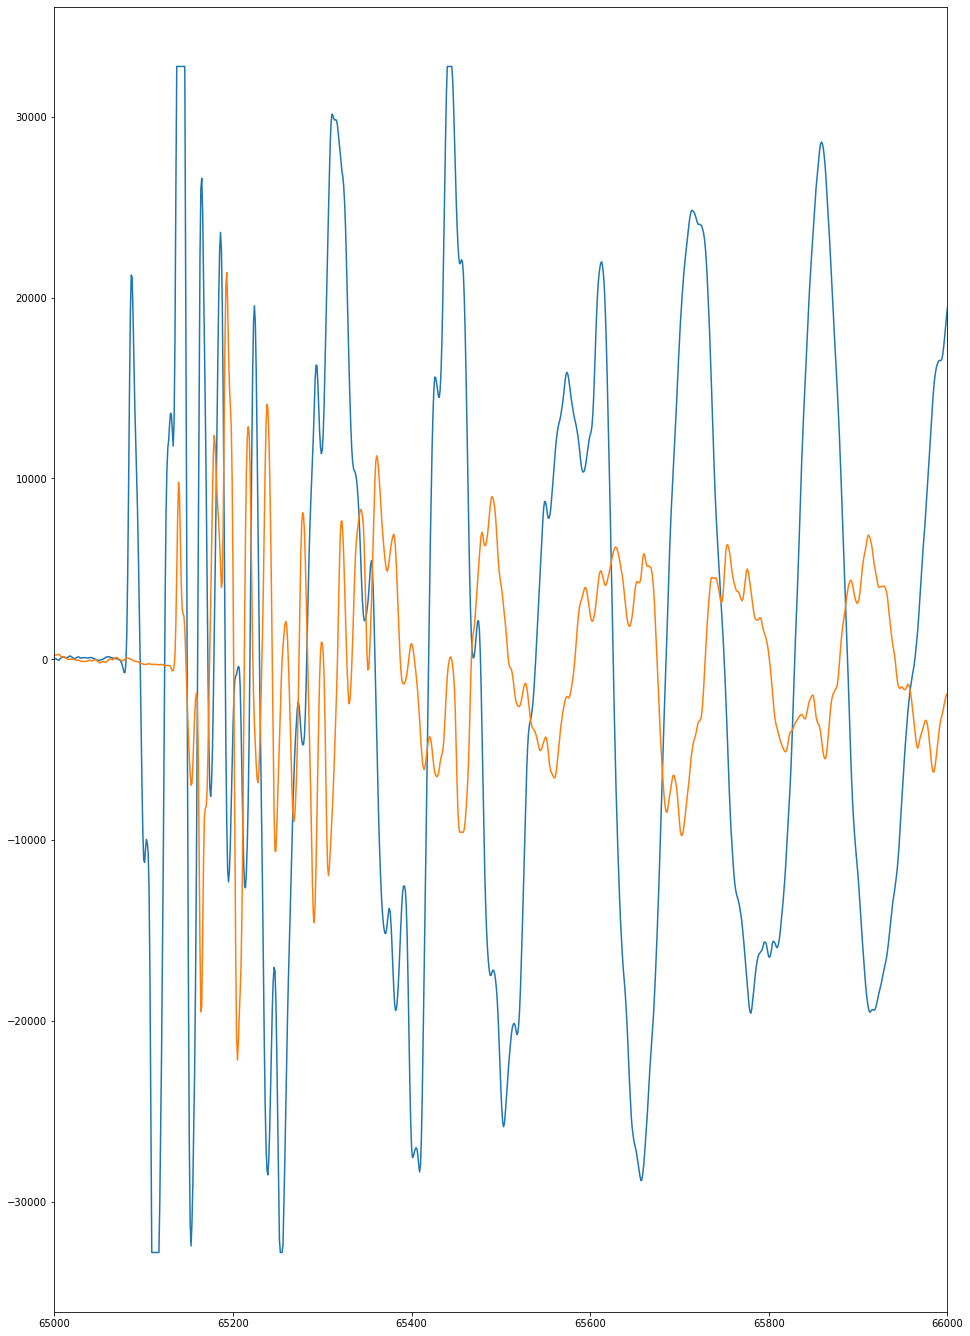

In [23]:
plot(data[:,0])
plot(data[:,1])
plot(66279,1000, "ro")
xlim(65000,66000)

In [24]:
n = [8, 13, 18, 21, 26, 29, 34, 36, 47]
ds = [0.00049415212797137,
 0.0009504095515757324,
 0.0013669674672590125,
 0.0015947953784688478,
 0.0018271029046539248,
 0.0019063882847167588,
 0.0021772440495472565,
 0.0026114859549261882,
 0.0030630560311804235]

In [26]:
#timestep*len(kozeli)

In [27]:
len(kozeli)/sps

NameError: name 'kozeli' is not defined

In [28]:
7.367403499570651e-05

7.367403499570651e-05

In [29]:
1/sps 

2.2675736961451248e-05

In [30]:
7.367403499570651e-05 /(1/sps )

3.249024943310657

In [31]:
mintavetel,hang = scipy.io.wavfile.read("homerseklet/10meres43c.wav")
kozeli = hang[:,0]
tavoli = hang[:,1]
kozeli_index = np.where(kozeli > 5000)[0][0]
tavoli_index = np.where(tavoli > 5000)[0][0]
timestep= (len(kozeli)/sps)/sps
ertek = (tavoli_index-kozeli_index) * timestep
ds.append(ertek)
n.append(tavoli_index-kozeli_index)
print(kozeli_index)
print(tavoli_index)


65083
65138


In [32]:
n

[8, 13, 18, 21, 26, 29, 34, 36, 47, 55]

In [33]:
ds = array(ds)/3.24 #rossz lépésköz korrigálása

In [34]:
print(ds)
print(std(ds))

[0.00015252 0.00029334 0.0004219  0.00049222 0.00056392 0.00058839
 0.00067199 0.00080601 0.00094539 0.00125064]
0.00030427500954490145


| Mérés | n | $\langle\Delta s\rangle$ | $\sigma(s)$ | $\Delta l$ [cm] | $\sigma(l)$|
|-------|---|---------------------------|-------------|-------------------|---|
| 1. | 8 | 0.00049415212797137 |0.00030427500954490145 | 7 | 1|
| 2. | 13 |  0.0009504095515757324 |0.00030427500954490145  | 10 | 1 |
| 3. | 18|  0.0013669674672590125 |0.00030427500954490145| 14 | 1 |
| 4. | 21|   0.0015947953784688478|0.00030427500954490145 | 16| 1 |
| 5. | 26|   0.0018271029046539248| 0.00030427500954490145| 19 | 1 |
| 6. | 29|   0.0019063882847167588|0.00030427500954490145 |22 | 1 |
| 7. | 34|   0.0021772440495472565 |0.00030427500954490145| 26| 1 |
| 8. | 36|    0.0026114859549261882|0.00030427500954490145 | 29 | 1 |
| 9. | 47|   0.0030630560311804235|0.00030427500954490145 | 37 | 1 |
| 10.| 55|  0.004052071924763858| 0.00030427500954490145| 43 | 1 |



Az illesztéshez választott modell: **XXX**, ami alapján a becsült hangsebesség: **XXX**.

A hangsebesség többek között függ a levegő hőmérsékletétől, ez alapján milyen hőmérsékletet becsül?

In [35]:
#hangforrás és mikrofon közti táv az 7 cm 
ds = np.concatenate((array([0]),ds))

In [36]:
def line(t,a,b):
    return a*t+b

In [37]:
from scipy.optimize import curve_fit
l = array([0,7,10,14,16,19,22,26,29,37,43])

popt,pcov = curve_fit(line,ds,l)
perr = sqrt(diag(pcov))

In [38]:
print(popt)
print(perr)

[3.58247539e+04 1.25149436e-01]
[1.48964570e+03 9.79187309e-01]


In [39]:
popt[0]/100

358.24753856266193

In [40]:
perr[0]/100

14.896457014637422

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

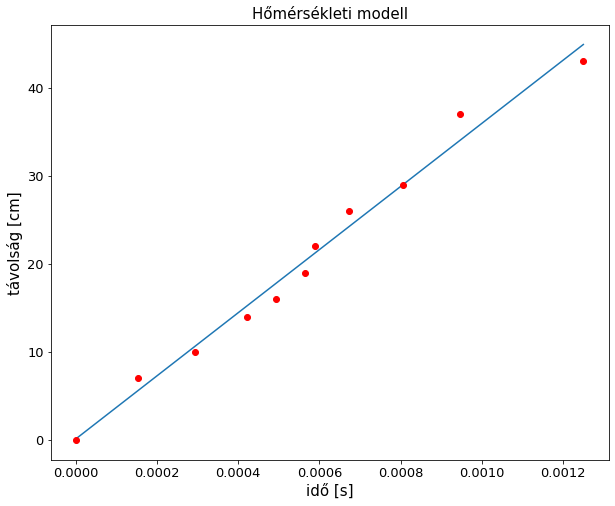

In [41]:
figsize(10,8)
plot(ds,line(array(ds),*popt))
plot(ds,l, "ro") 
title("Hőmérsékleti modell", size = 15)
xlabel("idő [s]", size = 15)
ylabel("távolság [cm]" ,size = 15)
xticks(size = 13)
yticks(size = 13)

In [42]:
(358.25 - 331.5)/0.6

44.583333333333336

## 3. feladat: Mikrofonkarakterisztika - 5 pont

Válasszon ki egy mikrofont, és az etalon hangforrás jelét különböző távolságból, különböző szögből vegye fel. Vizsgálja meg a pozíció függvényében a rögzített intenzitás nagyságát. Készítsen ábrákat a tapasztalatairól!

In [43]:
sp1,data1 = scipy.io.wavfile.read("karakterisztika/180fok.wav")
sp2,data2 = scipy.io.wavfile.read("karakterisztika/90fok.wav")
sp3,data3 = scipy.io.wavfile.read("karakterisztika/60fok.wav")
sp4,data4 = scipy.io.wavfile.read("karakterisztika/45fok.wav")

In [44]:
data = [data1,data2,data3,data4]
for item in data:
    print(max(item))

7531
15419
13935
12307


In [45]:
import wave

def calculate_intensity(file_path):
    with wave.open(file_path, 'rb') as wave_file:
        framerate = wave_file.getframerate()
        frames = wave_file.readframes(-1)
        samples = np.frombuffer(frames, dtype=np.int16)

    #hangnyomás(amplitudó) négyzetének időátlagolása 
    intensity = np.mean(samples.astype(float)**2)

    return intensity

In [46]:
intensity = []
intensity.append(calculate_intensity("karakterisztika/180fok.wav"))
intensity.append(calculate_intensity("karakterisztika/90fok.wav"))
intensity.append(calculate_intensity("karakterisztika/60fok.wav"))
intensity.append(calculate_intensity("karakterisztika/45fok.wav"))

In [47]:
intensity

[22919.221471386918, 117374.40940290858, 79898.32000971588, 61805.21448973372]

In [48]:
angle =array([180,90,60,45,0])
intensity = [22919.221471386918, 117374.40940290858, 79898.32000971588, 61805.21448973372,22919.221471386918]

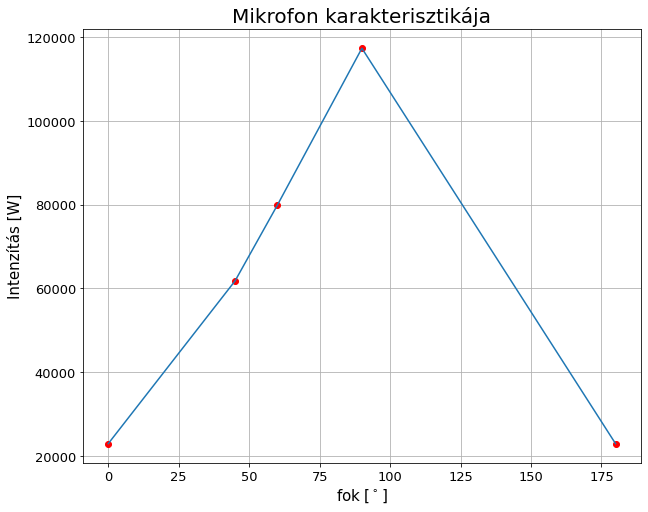

In [49]:
plot(angle,intensity,"ro")
plot(angle,intensity)
title("Mikrofon karakterisztikája", size = 20)
xlabel(r"fok [$^\circ$]", size = 15)
ylabel("Intenzítás [W]", size = 15)
xticks(size = 13)
yticks(size = 13)
grid(True)

## 4. feladat: Helymeghatározás síkon - 10 pont


A [leírásban](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0194394) szereplő likelihood becslés segítségével építsen sík-lokátort.

Dokumentálja a mérési összeállítást. Jelöljön ki egy arra alkalmas viszonyítási rendszert, és rögzítse hogy abban a mikrofonok helyét.

A választott koordinátarendszer leírása:
* Az origo helye: **XXX**,
* Az $x$-tengely: **XXX**,
* Az $y$-tengely: **XXX**,
* A $z$-tengely: **XXX**.

| Mikrofon száma | $x$ [_cm_] | $y$ [_cm_] | $z$ [_cm_] |
|----------------|------------|------------|------------|
| 1. | 90.4 | 10.5 | 1.5 |
| 2. | 13.5| 44 | 1.5 |
| 3. | 3 | 52.3 | 51.5 |
| 4. | 10.5 | 10 | 1.5|
| 5. | 109.2 | 39.1 | 1.5 |
| 6. | 48.7 | 33.7 | 1.5 |
| 7. | 54.6 | 17.9 | 1.5|

Az asztal síkjában keltsen hangot a *kopogtatóval*. A mikrofonok jele alapján határozza meg a hangforrás helyét. 

Milyen pontosságot tud elérni? *Megjegyzés:* A pontosság becsléséhez, természetesen érdemes feljegyezni a hangforrás helyét, amit a becsült pozícióval lehet majd összevetni.)